In [2]:
%load_ext autoreload
%autoreload 2

from ETL import *
from yahist import Hist1D

from yahist.fit import fit_hist
from yahist.utils import ignore_division_errors
import scipy
import os
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
style.use('seaborn-white')

### this file tests the functioning of the pixel class made in the file ETL.py. Nothing important in this file.

In [2]:
sens = Sensor2(height=21.4,width=21.6)
sens.setActiveArea()

In [3]:
sens.outline

[[-10.7, 10.8], [10.7, 10.8], [10.7, -10.8], [-10.7, -10.8]]

In [4]:
sens.activeArea

[[-10.399999999999999, 10.5],
 [10.399999999999999, 10.5],
 [10.399999999999999, -10.3],
 [-10.399999999999999, -10.3]]

In [5]:
sens.get_pixel_centers(m=16,n=16,gap=0.05)
sens.getPixelsOutline()

In [6]:
sens.__dict__.keys()

dict_keys(['height', 'width', 'x', 'y', 'color', 'deadspace1', 'deadspace2', 'x1', 'x2', 'y1', 'y2', 'outline', 'ax1', 'ax2', 'ay1', 'ay2', 'activeArea', 'n_pixels', 'x_pixel_size', 'y_pixel_size', 'x0', 'y0', 'centers_new_system', 'centers_pixels', 'pixels'])

In [7]:
sens.y_pixel_size

1.253125

In [8]:
sens.pixels

c:\Users\ymehr\OneDrive\Desktop\golf project\ETL-SH-Design-1\ETL.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(self.outline, color='blue', closed=True, edgecolor='black', alpha=0.6)


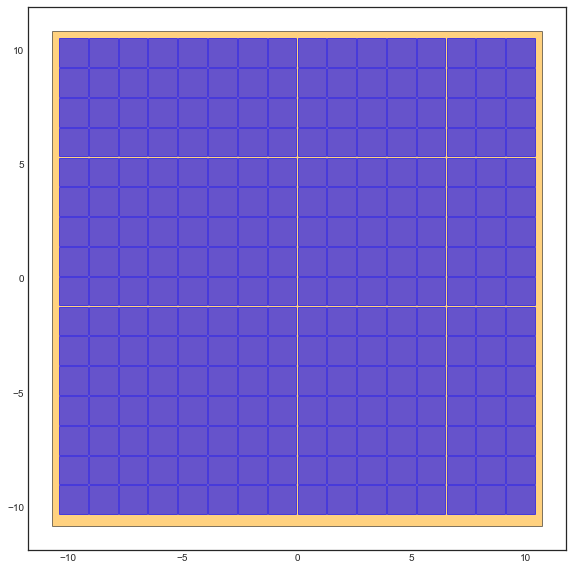

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
pm = sens.getPolygon()
plt.gca().add_patch(pm)

for pix in sens.pixels:
    plt.gca().add_patch(pix.getPolygon())

plt.axis('scaled')
plt.savefig('sensor.png')

In [10]:
(16-1)*0.05*sens.y_pixel_size*16 + (16-1)*0.05*sens.x_pixel_size*16

30.075

In [11]:
(445.2-30.5)/445.2

0.9314914645103324

In [12]:
(922.14-50)/922.14

0.945778298306114

In [14]:
with open('new_layouts/database_new_filled.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new'] 

In [15]:
s = Sensor2(21.4, 21.6)

dee = Dee(315, 1185)
dee.fromCenters2(disk_new['disk1']['front'], s, 16, 16, 0.05)

c:\Users\ymehr\OneDrive\Desktop\golf project\ETL-SH-Design-1\ETL.py:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(self.outline, color='blue', closed=True, edgecolor='black', alpha=0.6)


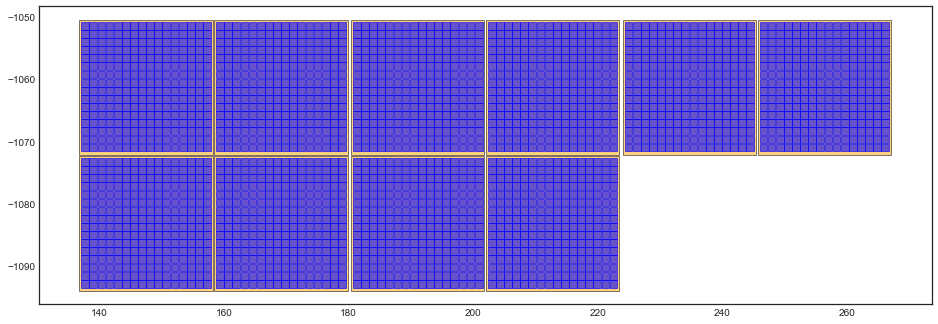

In [17]:
plt.rcParams['figure.figsize'] = [16, 16]

i = 0
for sen in dee.sensors:
    pm = sen.getPolygon()
    plt.gca().add_patch(pm)

    for pix in sen.pixels:
        plt.gca().add_patch(pix.getPolygon())
    
    i += 1
    if i == 10:
        break

plt.axis('scaled')
plt.savefig('a')

In [ ]:
from tqdm import tqdm as loader

In [ ]:
for i in loader(range(10)):
    print(i)

100%|██████████| 10/10 [00:00<00:00, 5003.94it/s]

0
1
2
3
4
5
6
7
8
9


In [16]:
with open('new_layouts/database_new_unfilled.yaml') as f:
    database_new = load(f, Loader=Loader)

disk_new = database_new['new'] 

In [17]:
a = disk_new['disk1']['front']
b = disk_new['disk1']['back']

In [5]:
x = [i[1] for i in a]
x = list(set(x))
x.sort(reverse=True)

y = [i[1] for i in b]
y = list(set(y))
y.sort(reverse=True)

In [6]:
diff = [y[i]-x[i] for i in range(len(x))]
shift = sum(diff)/len(diff)
shift

43.15769230769226

In [7]:
for i in range(len(a)):
    temp = list((a[i][0],a[i][1]+shift))
    a[i] = tuple(temp)

In [8]:
a

[(147.52499999999998, -1018.1673076923078),
 (169.17499999999998, -1018.1673076923078),
 (147.52499999999998, -1040.0173076923077),
 (169.17499999999998, -1040.0173076923077),
 (191.12499999999997, -1018.1673076923078),
 (212.77499999999998, -1018.1673076923078),
 (191.12499999999997, -1040.0173076923077),
 (212.77499999999998, -1040.0173076923077),
 (234.725, -1018.1673076923078),
 (256.375, -1018.1673076923078),
 (234.725, -1040.0173076923077),
 (256.375, -1040.0173076923077),
 (16.725, -932.4673076923077),
 (38.375, -932.4673076923077),
 (16.725, -954.3173076923076),
 (38.375, -954.3173076923076),
 (60.32500000000001, -932.4673076923077),
 (81.97500000000001, -932.4673076923077),
 (60.32500000000001, -954.3173076923076),
 (81.97500000000001, -954.3173076923076),
 (103.92500000000001, -932.4673076923077),
 (125.575, -932.4673076923077),
 (103.92500000000001, -954.3173076923076),
 (125.575, -954.3173076923076),
 (147.52499999999998, -932.4673076923077),
 (169.17499999999998, -932.4673

In [9]:
c = [i[0] for i in a]
c = list(set(c))
c.sort(reverse=True)

d = [i[0] for i in b]
d = list(set(d))
d.sort(reverse=True)

In [10]:
diff = [abs(c[i]-d[i]) for i in range(len(c))]
diff

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [18]:
s1 = Sensor(21.4, 21.6,color='red')
s = Sensor(21.4, 21.6)
dee = Dee(315, 1185)
dee.fromCenters(a, s)

dee2 = Dee(315,1185)
dee2.fromCenters(b,s1)

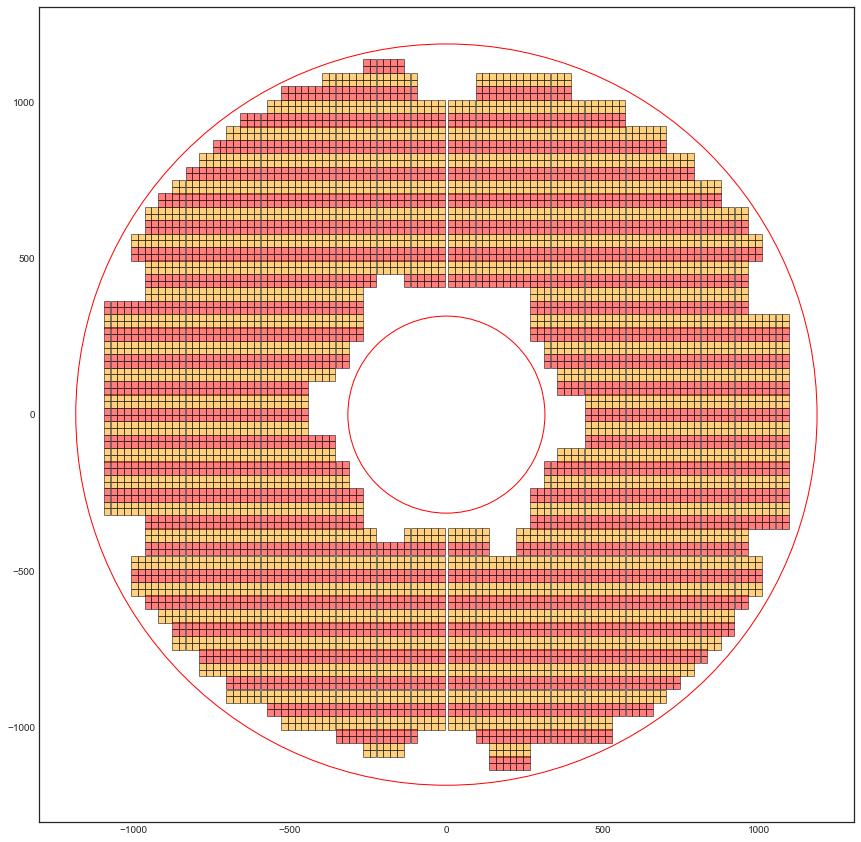

In [19]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for sens in dee.sensors:
    plt.gca().add_patch(sens.getPolygon())

for sens in dee2.sensors:
    plt.gca().add_patch(sens.getPolygon())

plt.axis('scaled')
# plt.savefig('non overlap.png')
plt.show()

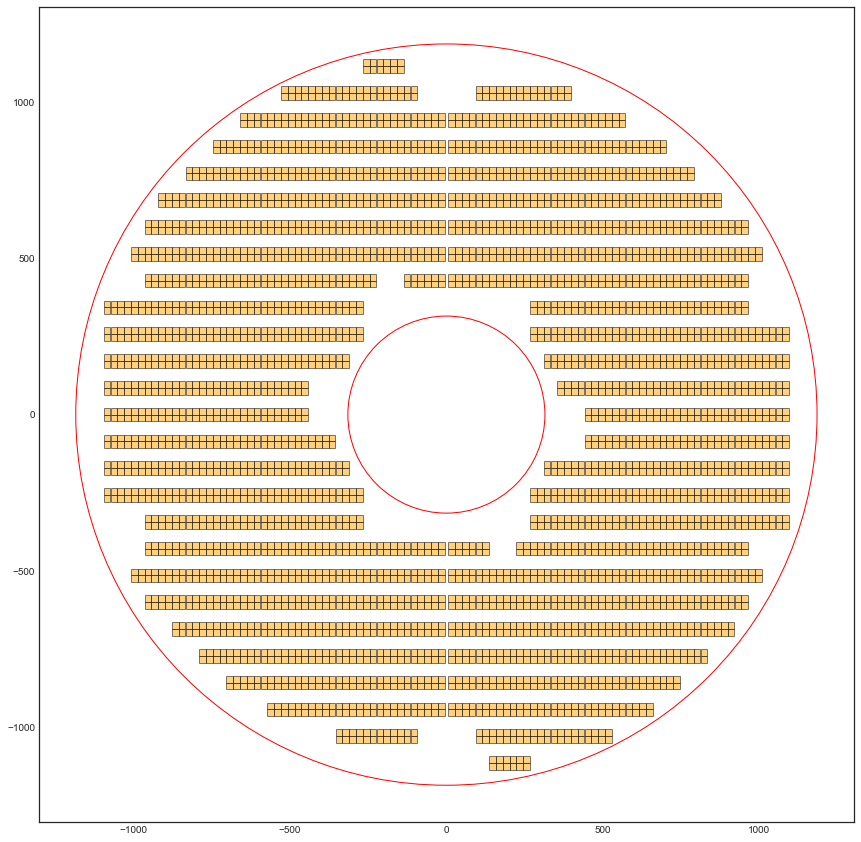

In [17]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for sens in dee2.sensors:
    plt.gca().add_patch(sens.getPolygon())

plt.axis('scaled')
plt.show()

In [36]:
a

[(387.175, 1082.175),
 (365.52500000000003, 1082.175),
 (343.575, 1082.175),
 (321.925, 1082.175),
 (299.97499999999997, 1082.175),
 (278.325, 1082.175),
 (256.375, 1082.175),
 (234.725, 1082.175),
 (212.77499999999998, 1082.175),
 (191.12499999999997, 1082.175),
 (169.17499999999998, 1082.175),
 (147.52499999999998, 1082.175),
 (125.575, 1082.175),
 (103.92500000000001, 1082.175),
 (-103.92500000000001, 1082.175),
 (-125.57500000000002, 1082.175),
 (-147.525, 1082.175),
 (-169.175, 1082.175),
 (-191.125, 1082.175),
 (-212.775, 1082.175),
 (-234.72500000000002, 1082.175),
 (-256.375, 1082.175),
 (-278.325, 1082.175),
 (-299.97499999999997, 1082.175),
 (-321.925, 1082.175),
 (-343.575, 1082.175),
 (-365.52500000000003, 1082.175),
 (-387.175, 1082.175),
 (387.175, 1060.325),
 (365.52500000000003, 1060.325),
 (343.575, 1060.325),
 (321.925, 1060.325),
 (299.97499999999997, 1060.325),
 (278.325, 1060.325),
 (256.375, 1060.325),
 (234.725, 1060.325),
 (212.77499999999998, 1060.325),
 (191.1

In [43]:
large_sensor_v1 = {}
s = Sensor(42.5, 22)
m = Module(43.10, 56.50, n_sensor_x=1, n_sensor_y=2, sensor_distance_y=22.5, sensor_distance_x=42.5+0.1)

m.populate(s)

rb = ReadoutBoard(10,56.5, color='green')
pb = ReadoutBoard(10,29.5, color='red')

SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

large_sensor_v1['D1'] = Dee(315, 1185)
large_sensor_v1['D1'].populate(SM, center_RB=True)

SM = SuperModule(m, pb, rb, n_modules=3, orientation='above')

large_sensor_v1['D2'] = Dee(315, 1185)
large_sensor_v1['D2'].populate(SM, center_PB=True)

SM = SuperModule(m, pb, rb, n_modules=3, orientation='below')

large_sensor_v1['D3'] = Dee(315, 1185)
large_sensor_v1['D3'].populate(SM, center_RB=True, shift_x=2.5, shift_y=3.5)

SM = SuperModule(m, pb, rb, n_modules=3, orientation='below')

large_sensor_v1['D4'] = Dee(315, 1185)
large_sensor_v1['D4'].populate(SM, center_PB=True, shift_x=2.5, shift_y=2.5)


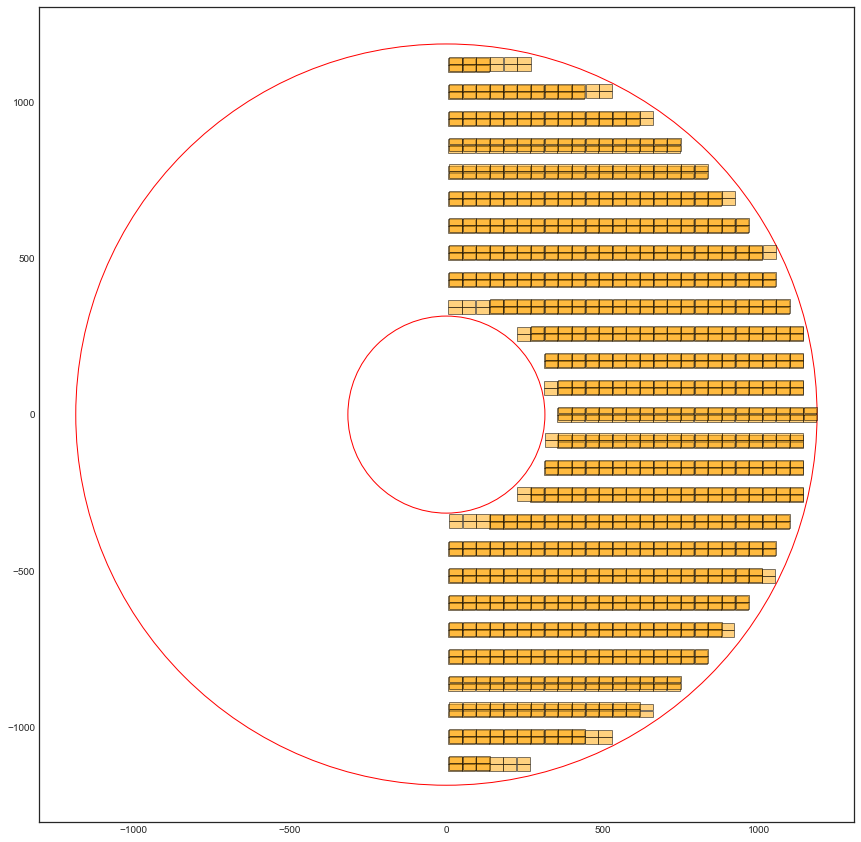

In [44]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for sm in large_sensor_v1['D1'].supermodules:
    for mod in sm.modules:
        for sens in mod.sensors:
            plt.gca().add_patch(sens.getPolygon())

for sm in large_sensor_v1['D3'].supermodules:
    for mod in sm.modules:
        for sens in mod.sensors:
            plt.gca().add_patch(sens.getPolygon())


plt.axis('scaled')
plt.show()

In [50]:
a = [sens.y for sm in large_sensor_v1['D1'].supermodules for mod in sm.modules for sens in mod.sensors]
b = [sens.y for sm in large_sensor_v1['D3'].supermodules for mod in sm.modules for sens in mod.sensors]

In [51]:
a = list(set(a))
b = list(set(b))

In [52]:
a.sort(reverse=True)
b.sort(reverse=True)


In [53]:
diff = [abs(a[i]-b[i]) for i in range(len(a))]

In [54]:
diff

[3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5,
 3.5]